In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%store -r dataframes

/var/folders/q7/0s4jjvb94hb_2_90j2545plw0000gn/T/ipykernel_2454/23289506.py:15: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  result['week_number'] = result.index.week // 2 + 1


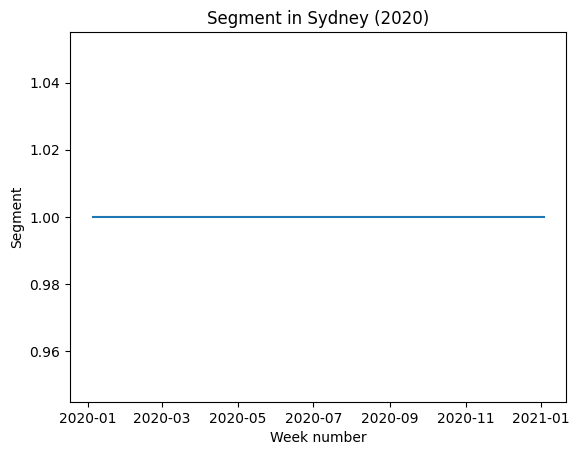

/var/folders/q7/0s4jjvb94hb_2_90j2545plw0000gn/T/ipykernel_2454/23289506.py:15: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  result['week_number'] = result.index.week // 2 + 1


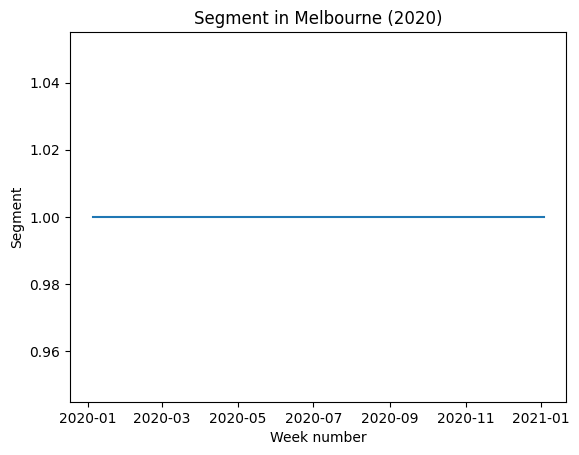

In [12]:
# draw line graph for each column per city per two weeks for the whole period
cities = ['sydney', 'melbourne']
years = ['2020', '2021', '2022']
columns_to_vis = ['Segment', 'WC', 'Analytic', 'cogproc', 'emo_pos', 'emo_anx', 'emo_anger', 'emo_sad', 'family', 'friend']

for city in cities:
    for year in years:
        df = dataframes[city + '_' + year]
        for column in columns_to_vis:
            vis_df = df[['utc_datetime_str', column]]
            vis_df.set_index('utc_datetime_str', inplace=True) # set 'date' column as the index
            vis_df.index = pd.to_datetime(vis_df.index) # convert index to datetime index

            result = vis_df.resample('2W').mean()
            result['week_number'] = result.index.week // 2 + 1
            result = result[['week_number', column]] # reorder columns

            # create a new figure and axis object for each plot
            fig, ax = plt.subplots()

            # plot the data on the current axis
            ax.plot(result[column], linestyle='solid')

            # set the title and axis labels
            ax.set_title(f'{column} in {city.capitalize()} ({year})')
            ax.set_xlabel('Week number')
            ax.set_ylabel(column)

            # display the plot
            plt.show()

In [ ]:
# Each column(bars and lines) for all the cities per one year, half a year, 4 months and 3 month for 4 years
new_dataframes = {}
for key, value in dataframes.items():
    columns_to_keep = columns_to_vis.append(['utc_datetime_str'])
    new_dataframes[key] = value.loc[:, columns_to_keep]

new_dataframes_2 = {}

for city in cities:
    # df_1 = new_dataframes[f"{city}_2019"]
    df_2 = new_dataframes[f"{city}_2020"]
    df_3 = new_dataframes[f"{city}_2021"]
    df_4 = new_dataframes[f"{city}_2022"]

    new_dataframes_2[city] = pd.concat([df_2, df_3, df_4])

